# Proyek Pertama: Menyelesaikan Permasalahan Human Resources Perusahaan Jaya Jaya Maju


- Nama: Muchammad Wildan Alkautsar
- Email: muchammadwr@gmail.com
- Id Dicoding: muchammadwr


## Persiapan


### Menyiapkan library yang dibutuhkan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Menyiapkan data yang akan diguankan


## Data Understanding


In [2]:
# Load the dataset
df = pd.read_csv("./data/employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Preparation / Preprocessing


In [3]:
# Check the 1/2 first of the DataFrame info
df_pertama = df.iloc[:, : len(df.columns) // 2]
df_pertama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeId               1470 non-null   int64  
 1   Age                      1470 non-null   int64  
 2   Attrition                1058 non-null   float64
 3   BusinessTravel           1470 non-null   object 
 4   DailyRate                1470 non-null   int64  
 5   Department               1470 non-null   object 
 6   DistanceFromHome         1470 non-null   int64  
 7   Education                1470 non-null   int64  
 8   EducationField           1470 non-null   object 
 9   EmployeeCount            1470 non-null   int64  
 10  EnvironmentSatisfaction  1470 non-null   int64  
 11  Gender                   1470 non-null   object 
 12  HourlyRate               1470 non-null   int64  
 13  JobInvolvement           1470 non-null   int64  
 14  JobLevel                

In [4]:
# check the 1/2 last of the DataFrame info
df_kedua = df.iloc[:, len(df.columns) // 2 :]
df_kedua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MaritalStatus             1470 non-null   object
 1   MonthlyIncome             1470 non-null   int64 
 2   MonthlyRate               1470 non-null   int64 
 3   NumCompaniesWorked        1470 non-null   int64 
 4   Over18                    1470 non-null   object
 5   OverTime                  1470 non-null   object
 6   PercentSalaryHike         1470 non-null   int64 
 7   PerformanceRating         1470 non-null   int64 
 8   RelationshipSatisfaction  1470 non-null   int64 
 9   StandardHours             1470 non-null   int64 
 10  StockOptionLevel          1470 non-null   int64 
 11  TotalWorkingYears         1470 non-null   int64 
 12  TrainingTimesLastYear     1470 non-null   int64 
 13  WorkLifeBalance           1470 non-null   int64 
 14  YearsAtCompany          

In [5]:
# Check missing values
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [6]:
# Handle Missing Values
df.dropna(inplace=True)

In [7]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [8]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


## Exploratory Data Analysis


Statistik Deskriptif


In [9]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


### Analisis Demografi & Personal Karyawan


Jumlah karyawan keluar berdasarkan rentang usia


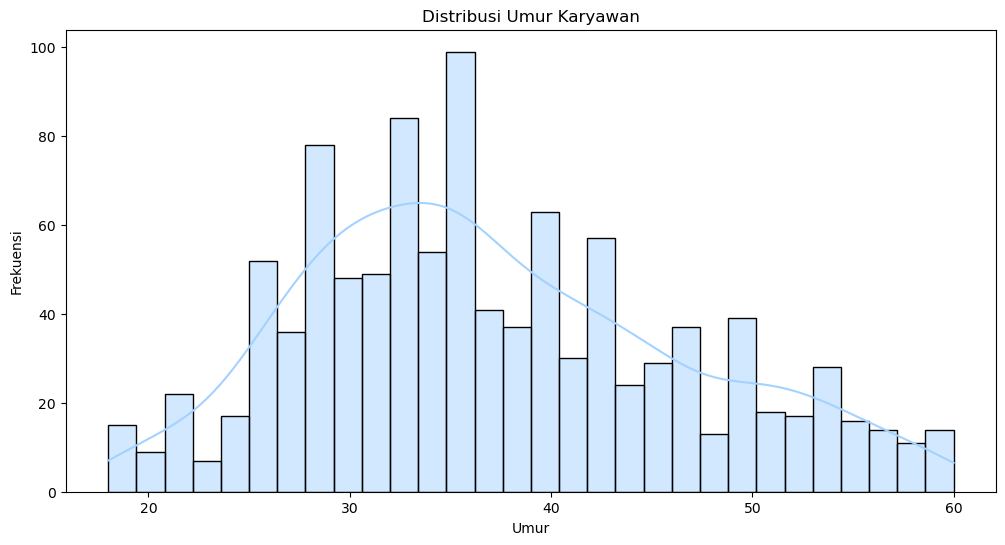

In [10]:
# Melihat distribusi data numerik
plt.figure(figsize=(12, 6))
sns.histplot(df["Age"], kde=True, bins=30, color="#A4D2FF")
plt.title("Distribusi Umur Karyawan")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

In [11]:
# Binning 10 tahun
bins = [18, 25, 35, 45, 55, 65]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# pivot
age_attr = pd.pivot_table(
    df[df["Attrition"] == 1], index="AgeGroup", values="Attrition", aggfunc="count"
).reset_index()


# Tampilkan tabel
age_attr

,AgeGroup,Attrition
0,18-24,29
1,25-34,85
2,35-44,39
3,45-54,17
4,55-64,9


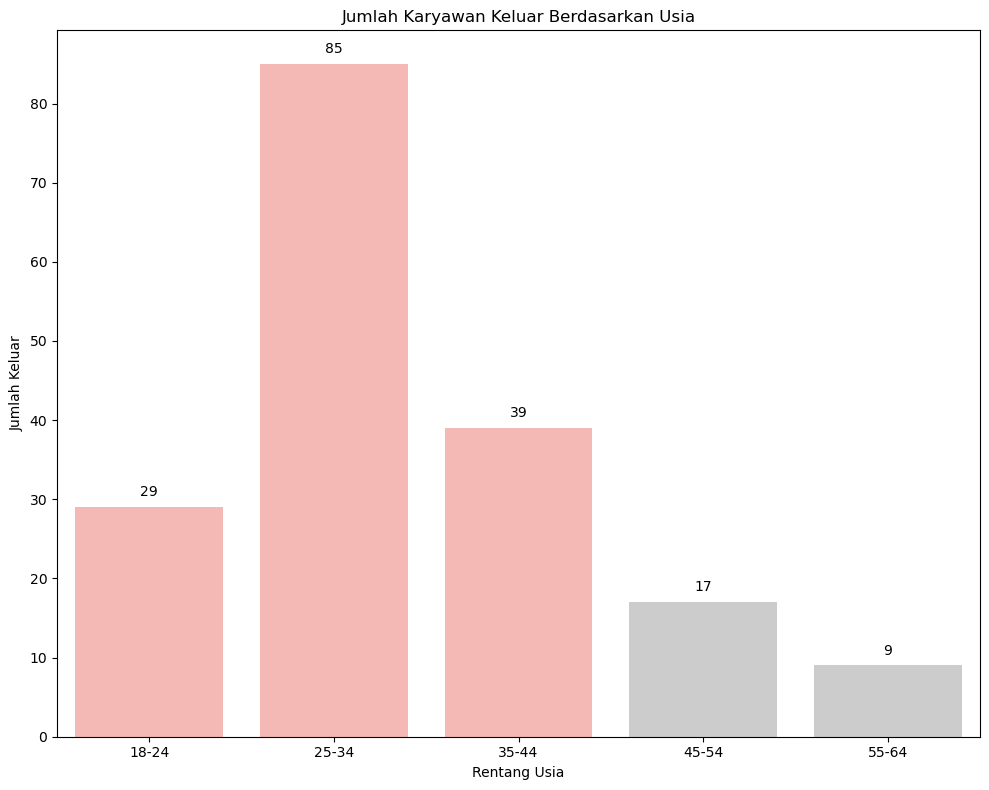

In [12]:
# Visualisasi

top3 = age_attr.sort_values("Attrition", ascending=False).head(3)["AgeGroup"].tolist()
colors = ["#FFB0A9" if age in top3 else "#CCCCCC" for age in age_attr["AgeGroup"]]

plt.figure(figsize=(10, 8))
bar = sns.barplot(data=age_attr, x="AgeGroup", y="Attrition", palette=colors)
for index, row in age_attr.iterrows():
    bar.text(
        x=index,
        y=row["Attrition"] + 1,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.title("Jumlah Karyawan Keluar Berdasarkan Usia")
plt.xlabel("Rentang Usia")
plt.ylabel("Jumlah Keluar")
plt.tight_layout()
plt.show()

Karyawan keluar berdasarkan gender


In [13]:
gender_attr = pd.pivot_table(
    df[df["Attrition"] == 1], index="Gender", values="Attrition", aggfunc="count"
).reset_index()
gender_attr

,Gender,Attrition
0,Female,71
1,Male,108


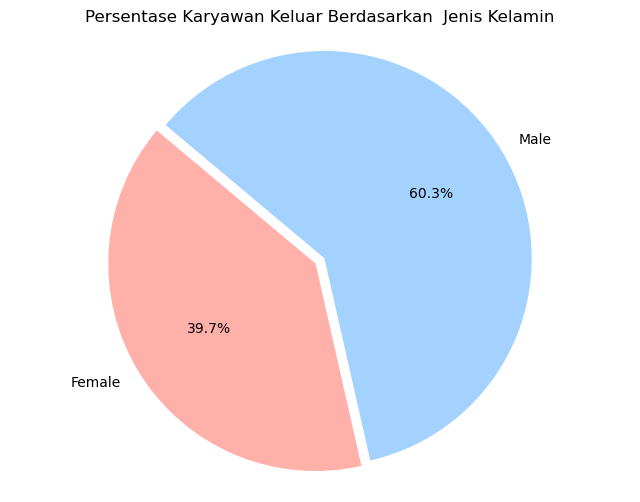

In [14]:
# Visualisasi
total_attrition = gender_attr["Attrition"].sum()
gender_attr["Percentage"] = (gender_attr["Attrition"] / total_attrition * 100).round(2)
plt.figure(figsize=(8, 6))
plt.pie(
    gender_attr["Percentage"],
    labels=gender_attr["Gender"],
    autopct="%1.1f%%",
    startangle=140,
    colors=["#FFB0A9", "#A4D2FF"],
    explode=(0.025, 0.025),
)
plt.axis("equal")
plt.title("Persentase Karyawan Keluar Berdasarkan  Jenis Kelamin")
plt.show()

Karyawan berdasarkan status pernikahan


In [15]:
marital_attr = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="MaritalStatus",
        values="Attrition",
        aggfunc="count",
    )
    .sort_values(by="Attrition", ascending=False)
    .reset_index()
)
marital_attr

,MaritalStatus,Attrition
0,Single,94
1,Married,62
2,Divorced,23


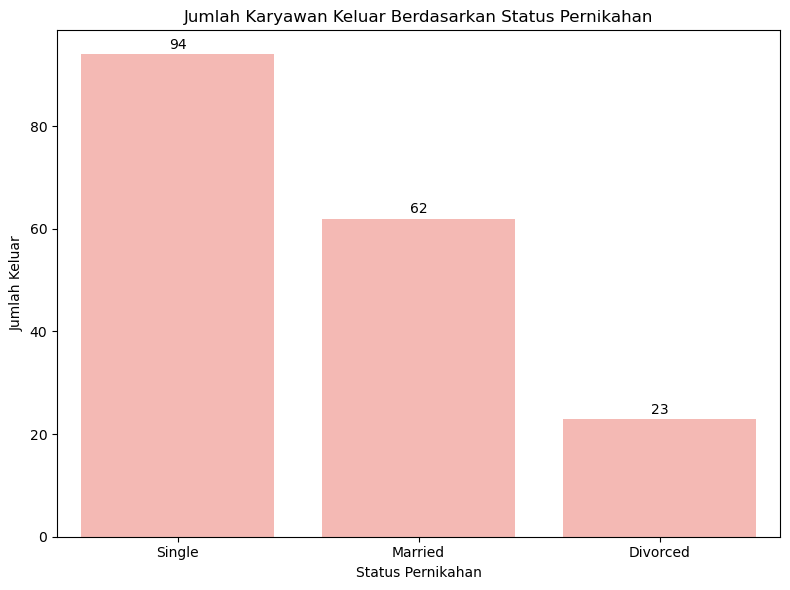

In [16]:
# Visualisasi
order = marital_attr["MaritalStatus"].tolist()

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=marital_attr, x="MaritalStatus", y="Attrition", color="#FFB0A9", order=order
)
plt.title("Jumlah Karyawan Keluar Berdasarkan Status Pernikahan")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah Keluar")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{int(height)}",
        ha="center",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

### Analisis Jabatan dan Organisasi


Jumlah Karyawan keluar per department


In [17]:
dept_attr = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="Department",
        values="Attrition",
        aggfunc="count",
    )
    .sort_values(by="Attrition", ascending=False)
    .reset_index()
)
dept_attr

,Department,Attrition
0,Research & Development,107
1,Sales,66
2,Human Resources,6


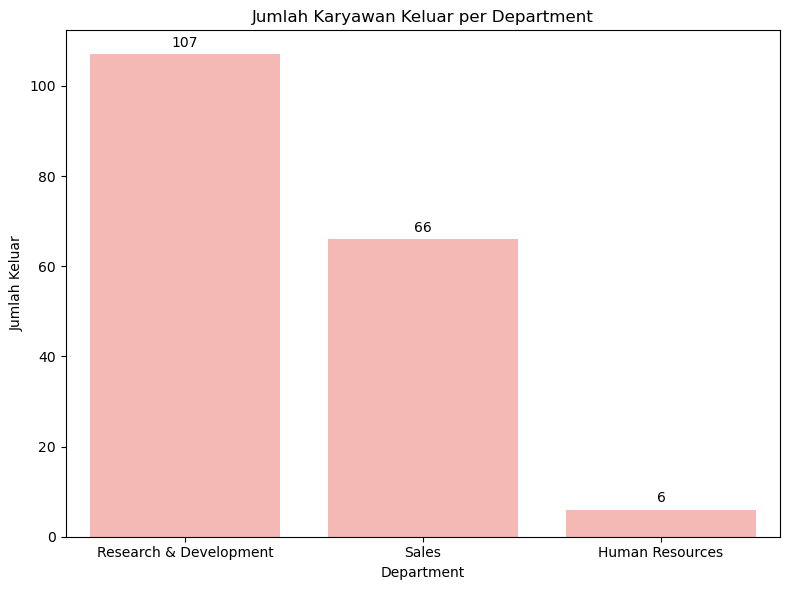

In [18]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=dept_attr, x="Department", y="Attrition", color="#FFB0A9")
plt.title("Jumlah Karyawan Keluar per Department")
plt.xlabel("Department")
plt.ylabel("Jumlah Keluar")
plt.tight_layout()
for index, row in dept_attr.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 1,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.show()

### Kompensasi & Kesejahteraan


Karyawan Keluar per Job Role


In [19]:
job_attr = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="JobRole",
        values="Attrition",
        aggfunc="count",
    )
    .sort_values(by="Attrition", ascending=False)
    .reset_index()
)
job_attr

,JobRole,Attrition
0,Laboratory Technician,49
1,Sales Executive,39
2,Research Scientist,38
3,Sales Representative,25
4,Healthcare Representative,8
5,Manufacturing Director,7
6,Human Resources,6
7,Manager,5
8,Research Director,2


In [20]:
category_job_role = {
    "Sales Executive": "Sales",
    "Research Scientist": "Research",
    "Laboratory Technician": "Research",
    "Manufacturing Director": "Manufacturing",
    "Healthcare Representative": "Healthcare",
    "Manager": "Management",
    "Sales Representative": "Sales",
    "Research Director": "Research",
    "Human Resources": "HR",
}

df["JobRoleCategory"] = df["JobRole"].map(category_job_role)

In [21]:
job_attrr_category = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="JobRoleCategory",
        values="Attrition",
        aggfunc="count",
    )
    .sort_values(by="Attrition", ascending=False)
    .reset_index()
)
job_attrr_category

,JobRoleCategory,Attrition
0,Research,89
1,Sales,64
2,Healthcare,8
3,Manufacturing,7
4,HR,6
5,Management,5


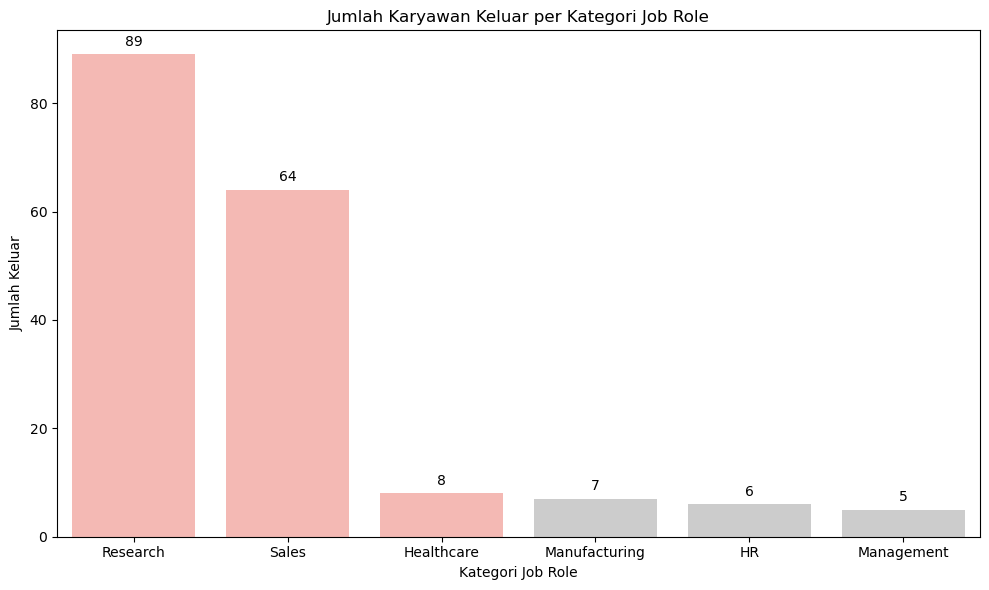

In [22]:
# Visualisasi
top_3_roles = (
    job_attrr_category.sort_values("Attrition", ascending=False)
    .head(3)["JobRoleCategory"]
    .tolist()
)

# Buat palette warna: pink untuk top 3, abu untuk lainnya
palette = {
    role: "#FFB0A9" if role in top_3_roles else "#CCCCCC"
    for role in job_attrr_category["JobRoleCategory"]
}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=job_attrr_category, x="JobRoleCategory", y="Attrition", palette=palette
)
plt.title("Jumlah Karyawan Keluar per Kategori Job Role")
plt.xlabel("Kategori Job Role")
plt.ylabel("Jumlah Keluar")
plt.xticks()

# Tambahkan label angka di atas bar
for index, row in job_attrr_category.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 1,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.tight_layout()
plt.show()

### Kepuasan & Komitmen Emosional


In [23]:
satisfaction = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}

df["CatJobSat"] = pd.cut(
    df["JobSatisfaction"],
    bins=[0, 1, 2, 3, 4],
    labels=list(satisfaction.values()),
    right=True,
)

job_sat = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="CatJobSat",
    values="Attrition",
    aggfunc="count",
).reset_index()

job_sat

,CatJobSat,Attrition
0,Low,46
1,Medium,32
2,High,62
3,Very High,39


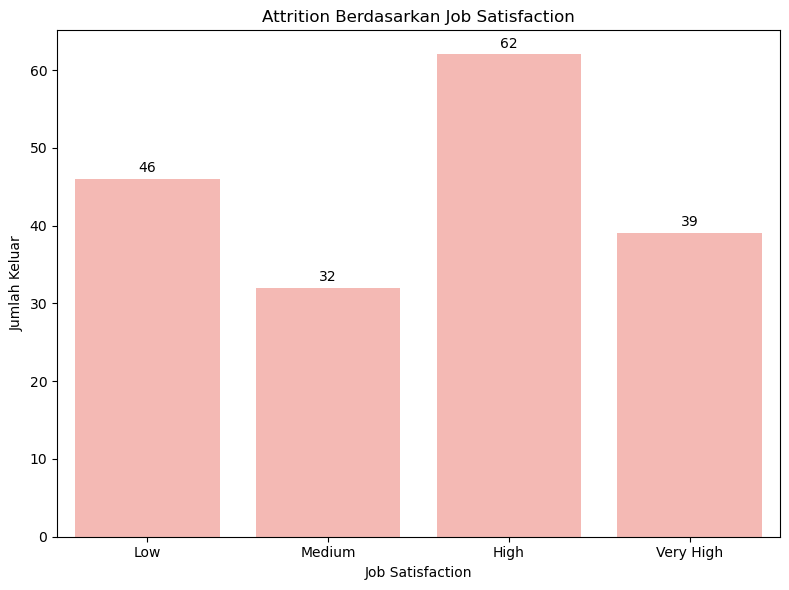

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(data=job_sat, x="CatJobSat", y="Attrition", color="#FFB0A9")
plt.title("Attrition Berdasarkan Job Satisfaction")
plt.ylabel("Jumlah Keluar")
plt.tight_layout()
for index, row in job_sat.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.xlabel("Job Satisfaction")
plt.tight_layout()
plt.show()

In [25]:
df["CatEnvSat"] = pd.cut(
    df["EnvironmentSatisfaction"],
    bins=[0, 1, 2, 3, 4],
    labels=list(satisfaction.values()),
    right=True,
)

job_sat = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="CatEnvSat",
    values="Attrition",
    aggfunc="count",
).reset_index()

job_sat

,CatEnvSat,Attrition
0,Low,57
1,Medium,35
2,High,47
3,Very High,40


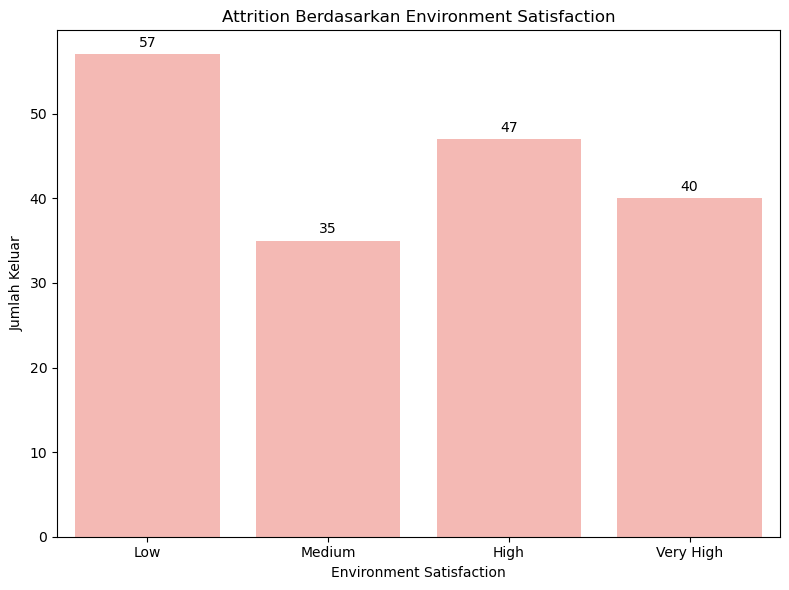

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=job_sat, x="CatEnvSat", y="Attrition", color="#FFB0A9")
plt.title("Attrition Berdasarkan Environment Satisfaction")
plt.ylabel("Jumlah Keluar")
plt.tight_layout()
for index, row in job_sat.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.xlabel("Environment Satisfaction")
plt.tight_layout()
plt.show()

In [27]:
df["CatRelSat"] = pd.cut(
    df["RelationshipSatisfaction"],
    bins=[0, 1, 2, 3, 4],
    labels=list(satisfaction.values()),
    right=True,
)

job_sat = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="CatRelSat",
    values="Attrition",
    aggfunc="count",
).reset_index()

job_sat

,CatRelSat,Attrition
0,Low,46
1,Medium,32
2,High,49
3,Very High,52


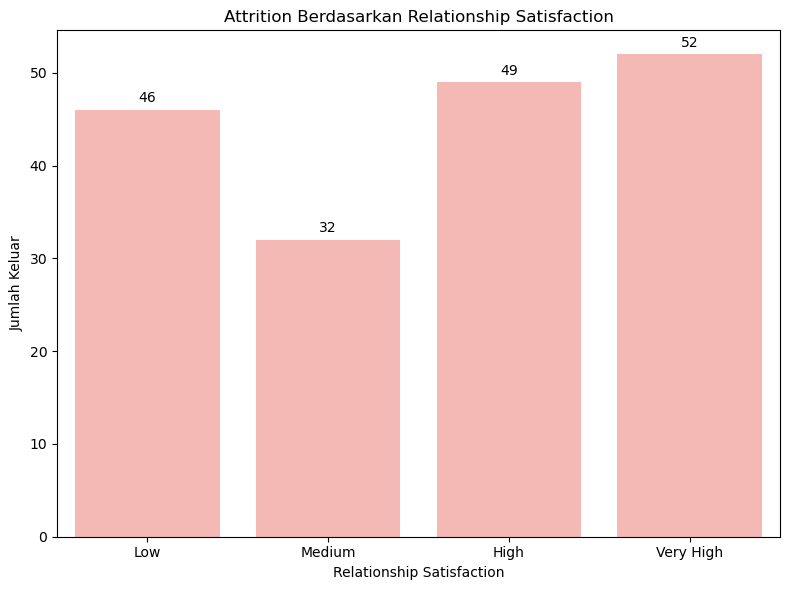

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(data=job_sat, x="CatRelSat", y="Attrition", color="#FFB0A9")
plt.title("Attrition Berdasarkan Relationship Satisfaction")
plt.ylabel("Jumlah Keluar")
plt.tight_layout()
for index, row in job_sat.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.xlabel("Relationship Satisfaction")
plt.tight_layout()
plt.show()

In [29]:
df["CatJobInv"] = pd.cut(
    df["JobInvolvement"],
    bins=[0, 1, 2, 3, 4],
    labels=list(satisfaction.values()),
    right=True,
)

job_sat = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="CatJobInv",
    values="Attrition",
    aggfunc="count",
).reset_index()

job_sat

,CatJobInv,Attrition
0,Low,22
1,Medium,55
2,High,92
3,Very High,10


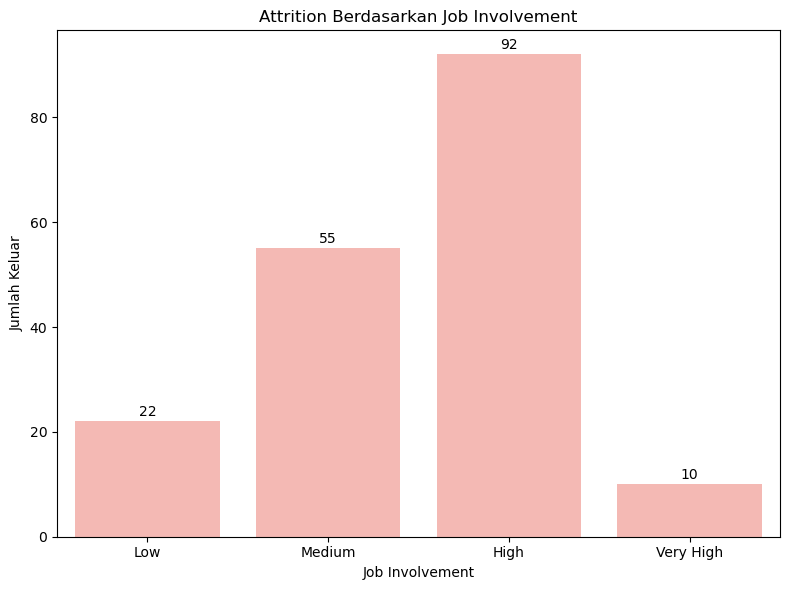

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(data=job_sat, x="CatJobInv", y="Attrition", color="#FFB0A9")
plt.title("Attrition Berdasarkan Job Involvement")
plt.ylabel("Jumlah Keluar")
plt.tight_layout()
for index, row in job_sat.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.xlabel("Job Involvement")
plt.tight_layout()
plt.show()

### Waktu & Pengalaman


In [31]:
years_company = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="YearsAtCompany",
        values="Attrition",
        aggfunc="count",
    )
    .sort_values("YearsAtCompany", ascending=True)
    .reset_index()
    .head(11)
)
years_company

,YearsAtCompany,Attrition
0,0,11
1,1,44
2,2,19
3,3,18
4,4,14
5,5,15
6,6,8
7,7,9
8,8,8
9,9,5


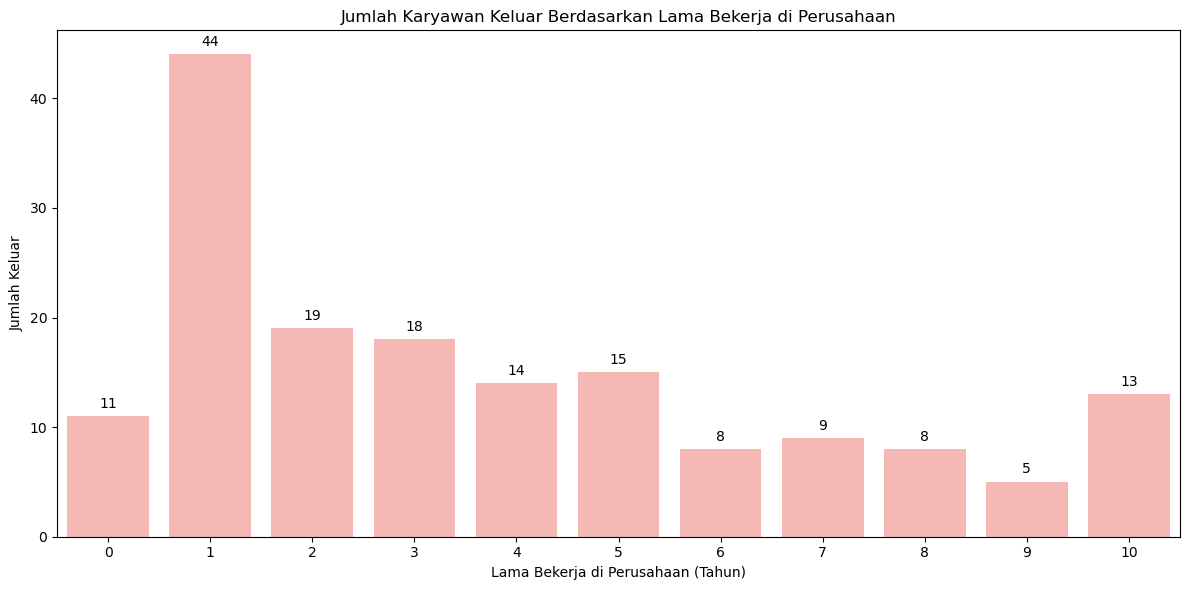

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=years_company["YearsAtCompany"], y=years_company["Attrition"], color="#FFB0A9"
)
plt.title("Jumlah Karyawan Keluar Berdasarkan Lama Bekerja di Perusahaan")
plt.xlabel("Lama Bekerja di Perusahaan (Tahun)")
plt.ylabel("Jumlah Keluar")
plt.xticks()
plt.tight_layout()
for index, row in years_company.iterrows():
    plt.text(
        x=row["YearsAtCompany"],
        y=row["Attrition"] + 0.5,
        s=int(row["Attrition"]),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.show()

In [33]:
years_current = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="YearsInCurrentRole",
        values="Attrition",
        aggfunc="count",
    )
    .reset_index()
    .head(11)
)
years_current

,YearsInCurrentRole,Attrition
0,0,53
1,1,6
2,2,53
3,3,13
4,4,13
5,6,2
6,7,24
7,8,6
8,9,3
9,10,2


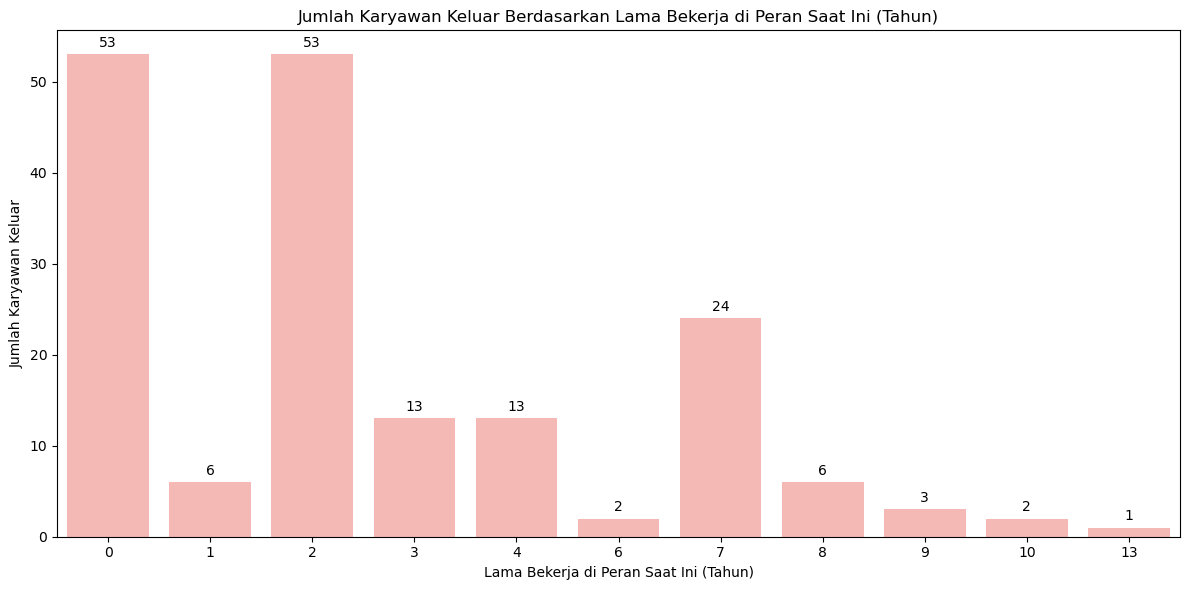

In [34]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=years_current["YearsInCurrentRole"], y=years_current["Attrition"], color="#FFB0A9"
)
plt.title("Jumlah Karyawan Keluar Berdasarkan Lama Bekerja di Peran Saat Ini (Tahun)")
plt.xlabel("Lama Bekerja di Peran Saat Ini (Tahun)")
plt.ylabel("Jumlah Karyawan Keluar")
plt.tight_layout()
for index, row in years_current.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.show()

In [35]:
years_promo = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="YearsSinceLastPromotion",
        values="Attrition",
        aggfunc="count",
    )
    .reset_index()
    .head(11)
)
years_promo

,YearsSinceLastPromotion,Attrition
0,0,83
1,1,39
2,2,17
3,3,7
4,4,5
5,5,2
6,6,3
7,7,13
8,9,3
9,11,2


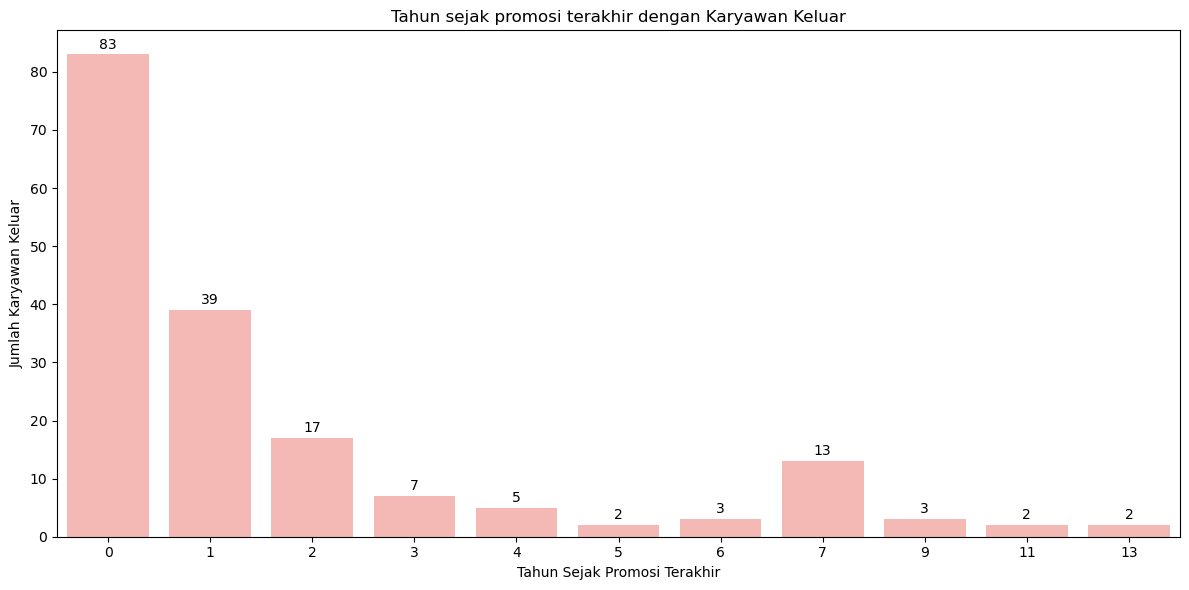

In [36]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=years_promo["YearsSinceLastPromotion"],
    y=years_promo["Attrition"],
    color="#FFB0A9",
)
plt.title("Tahun sejak promosi terakhir dengan Karyawan Keluar")
plt.xlabel("Tahun Sejak Promosi Terakhir")
plt.ylabel("Jumlah Karyawan Keluar")
plt.tight_layout()
for index, row in years_promo.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.show()

In [37]:
years_mgr = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="YearsWithCurrManager",
        values="Attrition",
        aggfunc="count",
    )
    .reset_index()
    .head(11)
)
years_mgr

,YearsWithCurrManager,Attrition
0,0,59
1,1,10
2,2,40
3,3,15
4,4,9
5,5,4
6,6,4
7,7,22
8,8,7
9,9,5


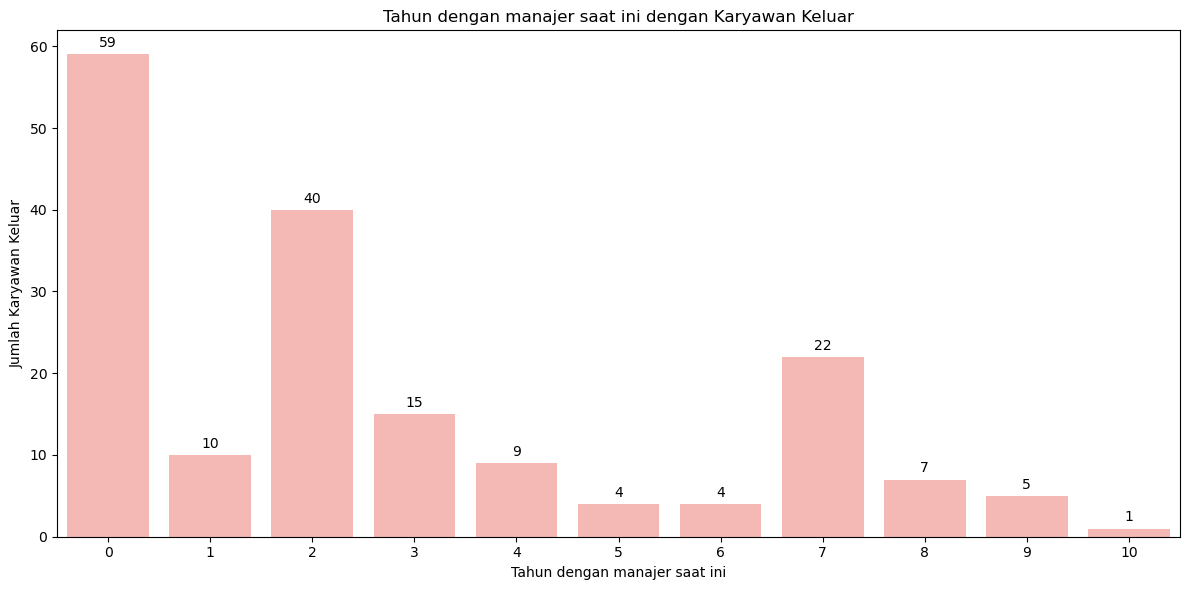

In [38]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=years_mgr["YearsWithCurrManager"],
    y=years_mgr["Attrition"],
    color="#FFB0A9",
)
plt.title("Tahun dengan manajer saat ini dengan Karyawan Keluar")
plt.xlabel("Tahun dengan manajer saat ini")
plt.ylabel("Jumlah Karyawan Keluar")
plt.tight_layout()
for index, row in years_mgr.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.show()

In [39]:
working_years = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="TotalWorkingYears",
        values="Attrition",
        aggfunc="count",
    )
    .reset_index()
    .head(11)
)
working_years

,TotalWorkingYears,Attrition
0,0,4
1,1,28
2,2,7
3,3,8
4,4,9
5,5,13
6,6,16
7,7,14
8,8,14
9,9,10


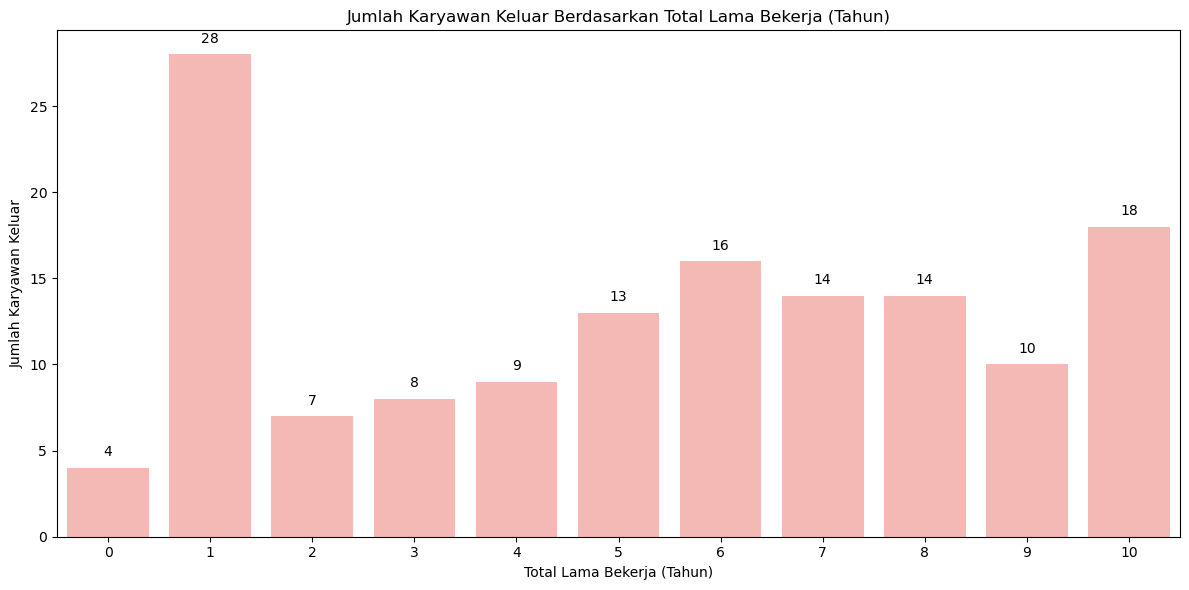

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=working_years["TotalWorkingYears"], y=working_years["Attrition"], color="#FFB0A9"
)
plt.title("Jumlah Karyawan Keluar Berdasarkan Total Lama Bekerja (Tahun)")
plt.xlabel("Total Lama Bekerja (Tahun)")
plt.ylabel("Jumlah Karyawan Keluar")
plt.tight_layout()
for index, row in working_years.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.show()

In [41]:
num_companies = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="NumCompaniesWorked",
    values="Attrition",
    aggfunc="count",
).reset_index()
num_companies

,NumCompaniesWorked,Attrition
0,0,19
1,1,74
2,2,12
3,3,11
4,4,12
5,5,13
6,6,11
7,7,13
8,8,5
9,9,9


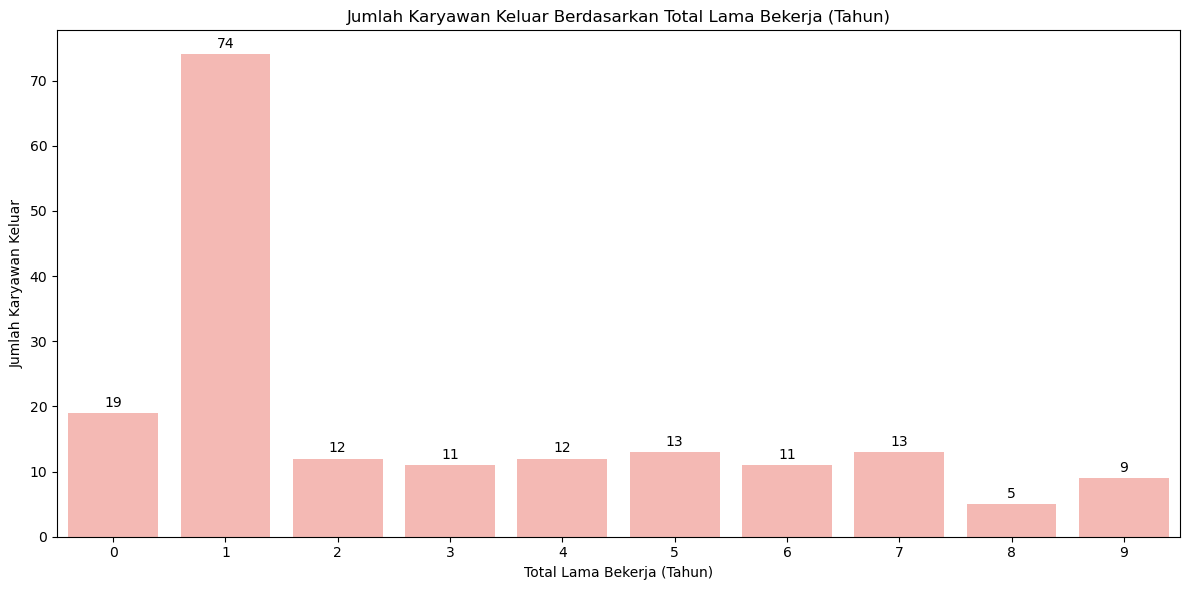

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=num_companies["NumCompaniesWorked"], y=num_companies["Attrition"], color="#FFB0A9"
)
plt.title("Jumlah Karyawan Keluar Berdasarkan Total Lama Bekerja (Tahun)")
plt.xlabel("Total Lama Bekerja (Tahun)")
plt.ylabel("Jumlah Karyawan Keluar")
plt.tight_layout()
for index, row in num_companies.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.show()

### Mobilitas & Komitmen


In [43]:
distance = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="DistanceFromHome",
    values="Attrition",
    aggfunc="count",
).reset_index()
distance

,DistanceFromHome,Attrition
0,1,20
1,2,22
2,3,12
3,4,9
4,5,9
5,6,7
6,7,5
7,8,7
8,9,11
9,10,8


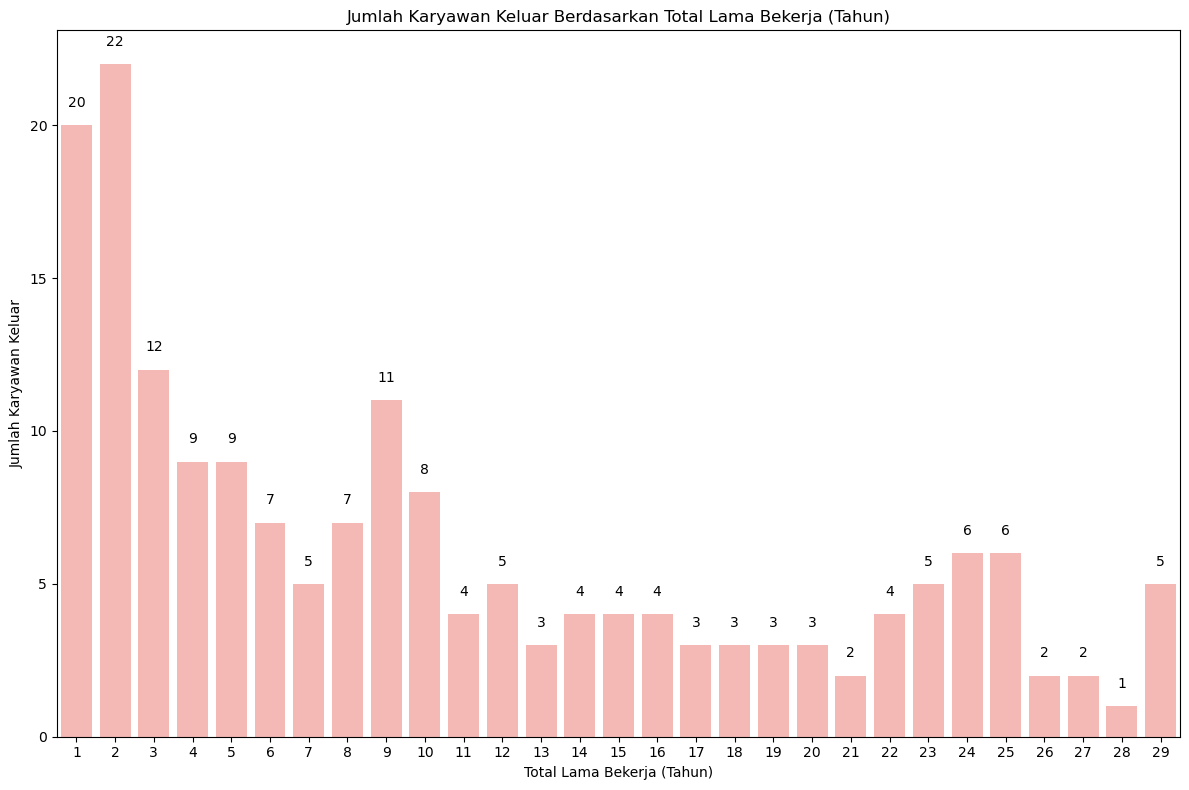

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(x=distance["DistanceFromHome"], y=distance["Attrition"], color="#FFB0A9")
plt.title("Jumlah Karyawan Keluar Berdasarkan Total Lama Bekerja (Tahun)")
plt.xlabel("Total Lama Bekerja (Tahun)")
plt.ylabel("Jumlah Karyawan Keluar")
plt.tight_layout()
for index, row in distance.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.show()

In [45]:
bt = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="BusinessTravel",
    values="Attrition",
    aggfunc="count",
).reset_index()
bt

,BusinessTravel,Attrition
0,Non-Travel,11
1,Travel_Frequently,51
2,Travel_Rarely,117


In [ ]:
travel = {
    "Non-Travel": "Non Travel",
    "Travel_Rarely": "Travel Rarely",
    "Travel_Frequently": "Travel Frequently",
}
df["BusinessTravel"] = df["BusinessTravel"].map(travel)

In [52]:
bt = (
    pd.pivot_table(
        df[df["Attrition"] == 1],
        index="BusinessTravel",
        values="Attrition",
        aggfunc="count",
    )
    .sort_values("Attrition", ascending=False)
    .reset_index()
)
bt

,BusinessTravel,Attrition
0,Travel Rarely,117
1,Travel Frequently,51
2,Non Travel,11


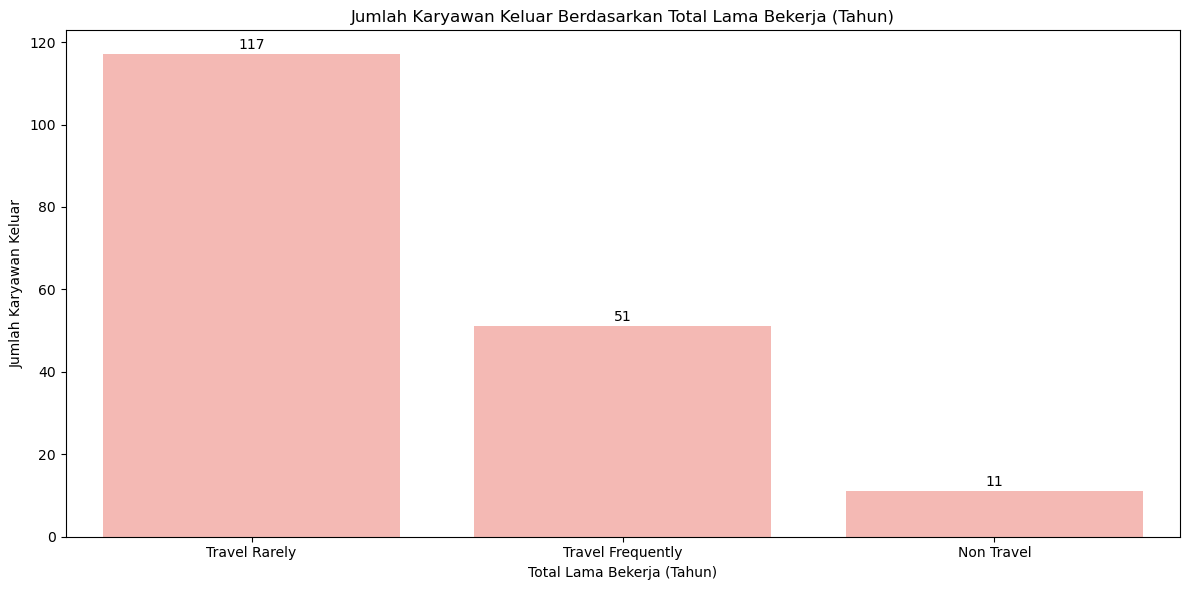

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=bt["BusinessTravel"], y=bt["Attrition"], color="#FFB0A9")
plt.title("Jumlah Karyawan Keluar Berdasarkan Total Lama Bekerja (Tahun)")
plt.xlabel("Total Lama Bekerja (Tahun)")
plt.ylabel("Jumlah Karyawan Keluar")
for index, row in bt.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.tight_layout()
plt.show()

In [55]:
ot = pd.pivot_table(
    df[df["Attrition"] == 1],
    index="OverTime",
    values="Attrition",
    aggfunc="count",
).reset_index()
ot

,OverTime,Attrition
0,No,81
1,Yes,98


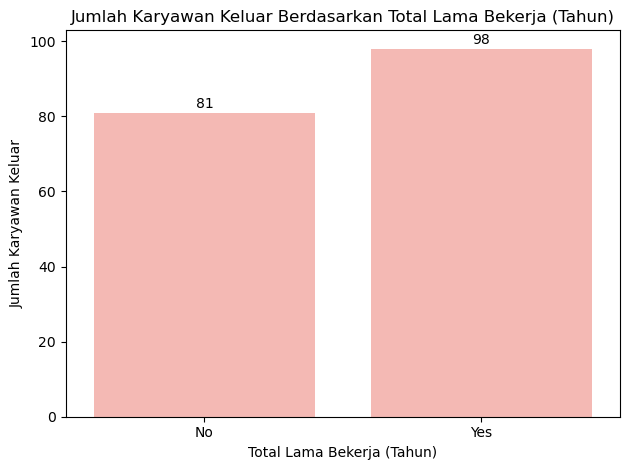

In [ ]:
plt.figure()
sns.barplot(x=ot["OverTime"], y=ot["Attrition"], color="#FFB0A9")
plt.title("Jumlah Karyawan Keluar Berdasarkan Total Lama Bekerja (Tahun)")
plt.xlabel("Total Lama Bekerja (Tahun)")
plt.ylabel("Jumlah Karyawan Keluar")
for index, row in ot.iterrows():
    plt.text(
        x=index,
        y=row["Attrition"] + 0.5,
        s=str(int(row["Attrition"])),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.tight_layout()
plt.show()

## Modeling


## Evaluation
